###Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline 
import csv
import numpy as np 
import scipy.stats as sp 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns

In [ ]:
#Reading data
raw_data = pd.read_sas('/content/drive/MyDrive/DM Project/Data/LLCP2021.XPT')
raw_data.shape

/usr/local/lib/python3.8/dist-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


(438693, 303)

In [ ]:
#Selecting columns required. Source: https://www.cdc.gov/brfss/annual_data/2021/pdf/2021-calculated-variables-version4-508.pdf
data = raw_data[['_RFHLTH', '_PHYS14D', '_MENT14D', '_TOTINDA', '_RFHYPE6', '_RFCHOL3', '_SEX', '_AGE_G', '_BMI5CAT', '_SMOKER3', '_RFDRHV7', '_MICHD']]
data.head()

,_RFHLTH,_PHYS14D,_MENT14D,_TOTINDA,_RFHYPE6,_RFCHOL3,_SEX,_AGE_G,_BMI5CAT,_SMOKER3,_RFDRHV7,_MICHD
0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,6.0,1.0,3.0,1.0,2.0
1,1.0,1.0,1.0,1.0,2.0,2.0,2.0,6.0,NaN,4.0,1.0,1.0
2,1.0,1.0,1.0,2.0,2.0,1.0,2.0,6.0,3.0,4.0,1.0,1.0
3,1.0,1.0,2.0,1.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,2.0
4,2.0,3.0,1.0,1.0,1.0,2.0,1.0,6.0,3.0,4.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _RFHLTH   438693 non-null  float64
 1   _PHYS14D  438693 non-null  float64
 2   _MENT14D  438693 non-null  float64
 3   _TOTINDA  438693 non-null  float64
 4   _RFHYPE6  438693 non-null  float64
 5   _RFCHOL3  377542 non-null  float64
 6   _SEX      438693 non-null  float64
 7   _AGE_G    438693 non-null  float64
 8   _BMI5CAT  391841 non-null  float64
 9   _SMOKER3  438693 non-null  float64
 10  _RFDRHV7  438693 non-null  float64
 11  _MICHD    434058 non-null  float64
dtypes: float64(12)
memory usage: 40.2 MB


In [ ]:
data.describe()

,_RFHLTH,_PHYS14D,_MENT14D,_TOTINDA,_RFHYPE6,_RFCHOL3,_SEX,_AGE_G,_BMI5CAT,_SMOKER3,_RFDRHV7,_MICHD
count,438693.000000,438693.000000,438693.000000,438693.000000,438693.000000,377542.000000,438693.000000,438693.000000,391841.000000,438693.000000,438693.000000,434058.000000
mean,1.186985,1.611678,1.634248,1.260891,1.427244,1.463000,1.535529,4.370432,3.008274,3.692327,1.692548,1.918621
std,0.547929,1.296879,1.222564,0.557932,0.699127,0.845036,0.498737,1.603392,0.833033,1.587708,2.163298,0.273416
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,3.000000,4.000000,1.000000,2.000000
75%,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6.000000,4.000000,4.000000,1.000000,2.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,6.000000,4.000000,9.000000,9.000000,2.000000


In [ ]:
data.isnull().sum()

_RFHLTH         0
_PHYS14D        0
_MENT14D        0
_TOTINDA        0
_RFHYPE6        0
_RFCHOL3    61151
_SEX            0
_AGE_G          0
_BMI5CAT    46852
_SMOKER3        0
_RFDRHV7        0
_MICHD       4635
dtype: int64

###Pre-processing

In [ ]:
#Profiling the data
#https://python.plainenglish.io/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f

! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 1.9 MB/s 
     |████████████████████████████████| 102 kB 33.2 MB/s 
     |████████████████████████████████| 696 kB 54.0 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.9 MB 61.8 MB/s 
     |████████████████████████████████| 4.7 MB 59.7 MB/s 
     |████████████████████████████████| 296 kB 81.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=278e403d1b6789aac6baf7e7e68a4371673d6f05a3d0cd309b68113c44c318c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-9fu2lcp2/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cccdfc866be512d8c805029e1d3b4646998ccb8d57f9df40d0271906a0bc37a1
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(data, html = {'style': {'full_width': True}}).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Removing null values
data.dropna(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Removing noisy data
#Value 9 the dataset represents "Don't know/ Refused/ Missing" values
drop_rows = []
for i in range(0, data.shape[0]):
  if 9 in data.iloc[i][:].tolist():
    drop_rows.append(i)

print(data.shape)
data.drop(data.index[drop_rows], axis=0, inplace = True)

(335481, 12)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data.head(10)

,_RFHLTH,_PHYS14D,_MENT14D,_TOTINDA,_RFHYPE6,_RFCHOL3,_SEX,_AGE_G,_BMI5CAT,_SMOKER3,_RFDRHV7,_MICHD
0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,6.0,1.0,3.0,1.0,2.0
2,1.0,1.0,1.0,2.0,2.0,1.0,2.0,6.0,3.0,4.0,1.0,1.0
3,1.0,1.0,2.0,1.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,2.0
4,2.0,3.0,1.0,1.0,1.0,2.0,1.0,6.0,3.0,4.0,1.0,1.0
5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,6.0,2.0,3.0,1.0,2.0
6,1.0,3.0,1.0,2.0,2.0,1.0,1.0,5.0,4.0,4.0,1.0,2.0
7,2.0,1.0,1.0,1.0,2.0,2.0,1.0,5.0,2.0,3.0,1.0,1.0
9,1.0,3.0,2.0,1.0,2.0,1.0,2.0,6.0,4.0,3.0,1.0,2.0
10,2.0,1.0,3.0,2.0,2.0,2.0,2.0,6.0,3.0,2.0,1.0,2.0
11,1.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,4.0,1.0,2.0


In [ ]:
data.shape

(307222, 12)

###Data Visualizations

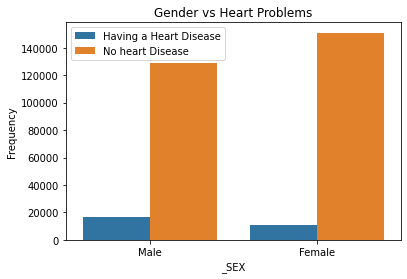

In [ ]:
# Gender vs Heart Problems
import seaborn as sns 

ax = sns.countplot(x="_SEX", hue="_MICHD", data=data)
ax.set_title("Gender vs Heart Problems")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(2)
labels=["Male","Female"]
plt.xticks(num, labels)
plt.show()


In [ ]:
gender_ct = pd.crosstab(data['_MICHD'], data['_SEX'])
print (gender_ct)

print("-----column percentages-----")
colsum=gender_ct.sum(axis=0)
colpct=gender_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs1= sp.chi2_contingency(gender_ct)
print (cs1)

_SEX       1.0     2.0
_MICHD                
1.0      16636   10917
2.0     128677  150992
-----column percentages-----
_SEX         1.0       2.0
_MICHD                    
1.0     0.114484  0.067427
2.0     0.885516  0.932573
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(2076.563113409562, 0.0, 1, array([[ 13032.2994089,  14520.7005911],
       [132280.7005911, 147388.2994089]]))


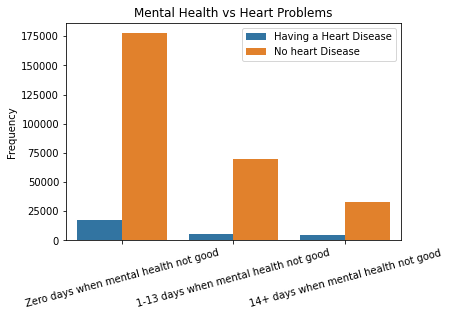

In [ ]:
# Mental Health vs Heart Problems

ax = sns.countplot(x="_MENT14D", hue="_MICHD", data=data)
ax.set_title("Mental Health vs Heart Problems")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(3)
labels=["Zero days when mental health not good","1-13 days when mental health not good","14+ days when mental health not good"]
plt.xlabel("")
plt.xticks(num, labels)
plt.xticks(rotation=15)
plt.show()


In [ ]:
mh_ct = pd.crosstab(data['_MICHD'], data['_MENT14D'])
print (gender_ct)

print("-----column percentages-----")
colsum=mh_ct.sum(axis=0)
colpct=mh_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs2= sp.chi2_contingency(mh_ct)
print (cs2)

_SEX       1.0     2.0
_MICHD                
1.0      16636   10917
2.0     128677  150992
-----column percentages-----
_MENT14D      1.0       2.0       3.0
_MICHD                               
1.0       0.09157  0.070992  0.117761
2.0       0.90843  0.929008  0.882239
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(684.945288489344, 1.8451020939592578e-149, 2, array([[ 17524.4979396 ,   6727.04241233,   3301.45964807],
       [177877.5020604 ,  68280.95758767,  33510.54035193]]))


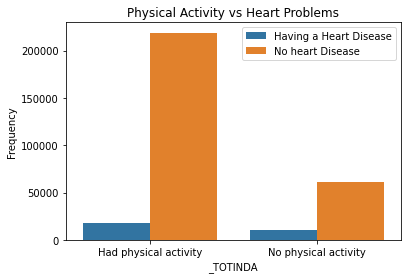

In [ ]:
# Physical Activity vs Heart Problems 

ax = sns.countplot(x="_TOTINDA", hue="_MICHD", data=data)
ax.set_title("Physical Activity vs Heart Problems")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(2)
labels=["Had physical activity","No physical activity"]
plt.xticks(num, labels)
plt.show()

In [ ]:
phyact_ct = pd.crosstab(data['_MICHD'], data['_TOTINDA'])
print (phyact_ct)
print("-----column percentages-----")

colsum=phyact_ct.sum(axis=0)
colpct=phyact_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs3= sp.chi2_contingency(phyact_ct)
print (cs3)

_TOTINDA     1.0    2.0
_MICHD                 
1.0        17512  10041
2.0       218744  60925
-----column percentages-----
_TOTINDA       1.0      2.0
_MICHD                     
1.0       0.074123  0.14149
2.0       0.925877  0.85851
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(3032.860863171832, 0.0, 1, array([[ 21188.46165965,   6364.53834035],
       [215067.53834035,  64601.46165965]]))


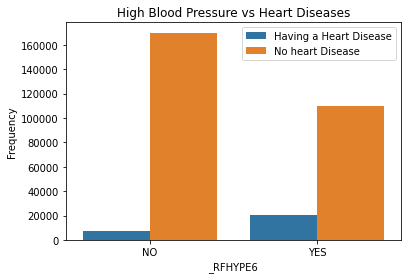

In [ ]:
# High Blood Pressure vs Heart Problems

ax = sns.countplot(x="_RFHYPE6", hue="_MICHD", data=data)
ax.set_title("High Blood Pressure vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(2)
labels=["NO","YES"]
plt.xticks(num, labels)
plt.show()

In [ ]:
bp_ct = pd.crosstab(data['_MICHD'], data['_RFHYPE6'])
print (bp_ct)
print("-----column percentages-----")

colsum=bp_ct.sum(axis=0)
colpct=bp_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs4= sp.chi2_contingency(bp_ct)
print (cs4)

_RFHYPE6     1.0     2.0
_MICHD                  
1.0         7050   20503
2.0       170033  109636
-----column percentages-----
_RFHYPE6       1.0       2.0
_MICHD                      
1.0       0.039812  0.157547
2.0       0.960188  0.842453
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(12734.623132737841, 0.0, 1, array([[ 15881.57065249,  11671.42934751],
       [161201.42934751, 118467.57065249]]))


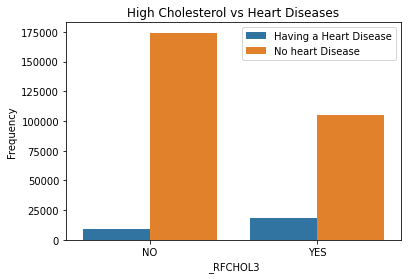

In [ ]:
# High Cholesterol vs Heart Diseases

ax = sns.countplot(x="_RFCHOL3", hue="_MICHD", data=data)
ax.set_title("High Cholesterol vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(2)
labels=["NO","YES"]
plt.xticks(num, labels)
plt.show()

In [ ]:
chol_ct = pd.crosstab(data['_MICHD'], data['_RFCHOL3'])
print (chol_ct)
print("-----column percentages-----")

colsum=chol_ct.sum(axis=0)
colpct=chol_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs6= sp.chi2_contingency(chol_ct)
print (cs6)

_RFCHOL3     1.0     2.0
_MICHD                  
1.0         9108   18445
2.0       174329  105340
-----column percentages-----
_RFCHOL3       1.0       2.0
_MICHD                      
1.0       0.049652  0.149008
2.0       0.950348  0.850992
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(8935.666003224558, 0.0, 1, array([[ 16451.42490121,  11101.57509879],
       [166985.57509879, 112683.42490121]]))


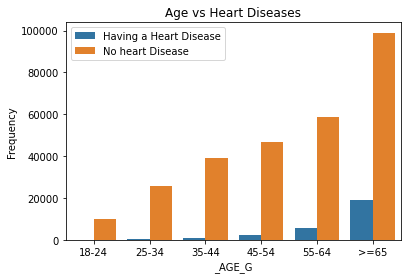

In [ ]:
# Age vs Heart Diseases

ax = sns.countplot(x="_AGE_G", hue="_MICHD", data=data)
ax.set_title("Age vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(6)
labels=["18-24","25-34","35-44","45-54","55-64",">=65"]
plt.xticks(num, labels)
plt.show()

In [ ]:
age_ct = pd.crosstab(data['_MICHD'], data['_AGE_G'])
print (age_ct)
print("-----column percentages-----")

colsum=age_ct.sum(axis=0)
colpct=age_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs7= sp.chi2_contingency(age_ct)
print (cs7)

_AGE_G    1.0    2.0    3.0    4.0    5.0    6.0
_MICHD                                          
1.0        58    268    718   2148   5474  18887
2.0     10213  25950  38962  46901  58689  98954
-----column percentages-----
_AGE_G       1.0       2.0       3.0       4.0       5.0       6.0
_MICHD                                                            
1.0     0.005647  0.010222  0.018095  0.043793  0.085314  0.160275
2.0     0.994353  0.989778  0.981905  0.956207  0.914686  0.839725
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(13880.049511814206, 0.0, 5, array([[   921.14777913,   2351.34382954,   3558.67431369,
          4398.9268249 ,   5754.41582634,  10568.4914264 ],
       [  9349.85222087,  23866.65617046,  36121.32568631,
         44650.0731751 ,  58408.58417366, 107272.5085736 ]]))


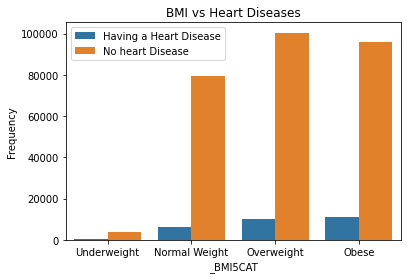

In [ ]:
# BMI vs Heart Diseases

ax = sns.countplot(x="_BMI5CAT", hue="_MICHD", data=data)
ax.set_title("BMI vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(4)
labels=["Underweight","Normal Weight","Overweight","Obese"]
plt.xticks(num, labels)
plt.show()

In [ ]:
bmi_ct = pd.crosstab(data['_MICHD'], data['_BMI5CAT'])
print (bmi_ct)
print("-----column percentages-----")

colsum=bmi_ct.sum(axis=0)
colpct=bmi_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs8= sp.chi2_contingency(bmi_ct)
print (cs8)

_BMI5CAT   1.0    2.0     3.0    4.0
_MICHD                              
1.0        379   6071   10025  11078
2.0       3671  79531  100430  96037
-----column percentages-----
_BMI5CAT      1.0       2.0       3.0       4.0
_MICHD                                         
1.0       0.09358  0.070921  0.090761  0.103422
2.0       0.90642  0.929079  0.909239  0.896578
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(619.0489336935773, 7.477121622415143e-134, 3, array([[   363.22154663,   7677.15823086,   9906.08294653,
          9606.53727598],
       [  3686.77845337,  77924.84176914, 100548.91705347,
         97508.46272402]]))


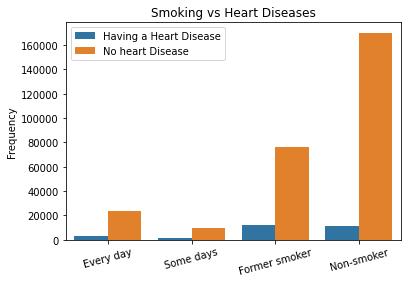

In [ ]:
# Smoking vs Heart Diseases

ax = sns.countplot(x="_SMOKER3", hue="_MICHD", data=data)
ax.set_title("Smoking vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(4)
labels=["Every day","Some days","Former smoker","Non-smoker"]
plt.xticks(rotation=15)
plt.xlabel("")
plt.xticks(num, labels)
plt.show()

In [ ]:
smoker_ct = pd.crosstab(data['_MICHD'], data['_SMOKER3'])
print (smoker_ct)
print("-----column percentages-----")

colsum=smoker_ct.sum(axis=0)
colpct=smoker_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs9= sp.chi2_contingency(smoker_ct)
print (cs9)

_SMOKER3    1.0   2.0    3.0     4.0
_MICHD                              
1.0        3242  1094  11718   11499
2.0       23782  9265  76493  170129
-----column percentages-----
_SMOKER3       1.0       2.0       3.0       4.0
_MICHD                                          
1.0       0.119967  0.105609  0.132841  0.063311
2.0       0.880033  0.894391  0.867159  0.936689
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(3895.5125270861054, 0.0, 3, array([[  2423.62940154,    929.04000039,   7911.14465435,
         16289.18594371],
       [ 24600.37059846,   9429.95999961,  80299.85534565,
        165338.81405629]]))


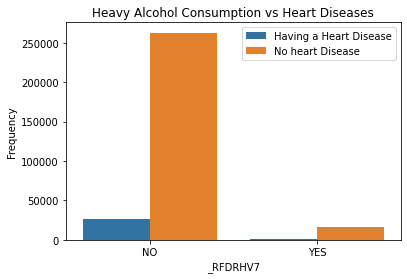

In [ ]:
# Heavy Alcohol Consumption vs Heart Diseases

ax = sns.countplot(x="_RFDRHV7", hue="_MICHD", data=data)
ax.set_title("Heavy Alcohol Consumption vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(2)
labels=["NO","YES"]
plt.xticks(num, labels)
plt.show()

In [ ]:
drinker_ct = pd.crosstab(data['_MICHD'], data['_RFDRHV7'])
print (drinker_ct)
print("-----column percentages-----")

colsum=drinker_ct.sum(axis=0)
colpct=drinker_ct/colsum
print(colpct)

import scipy.stats as sp 

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs10= sp.chi2_contingency(drinker_ct)
print (cs10)

_RFDRHV7     1.0    2.0
_MICHD                 
1.0        26509   1044
2.0       262693  16976
-----column percentages-----
_RFDRHV7       1.0       2.0
_MICHD                      
1.0       0.091663  0.057936
2.0       0.908337  0.942064
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(235.9336094505894, 3.029641045238925e-53, 1, array([[ 25936.88832831,   1616.11167169],
       [263265.11167169,  16403.88832831]]))


###Preparing the data for classification

In [ ]:
#Input - target data split
X, y = data.iloc[:, :-1], data.iloc[:, -1]
print(X.shape, y.shape)

In [ ]:
#Replacing all values of 2 with 0 i.e which indicates the subject did not have any heart complication. Also, changing the datatype of the column from float to interger 
y = y.replace(2.0, 0).astype(int)

In [ ]:
#Encoding
from sklearn.preprocessing import OneHotEncoder

oh_en = OneHotEncoder(handle_unknown='ignore', sparse=False)
X = oh_en.fit_transform(X)
print(X.shape)

In [ ]:
#oh_en.categories_

In [ ]:
#Using sampling to tackle the imbalaced values of the classes
#https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn
from imblearn.over_sampling import ADASYN
from collections import Counter

print(Counter(y)) #Shows the count of each class before sampling
X_samp, y_samp = ADASYN().fit_resample(X, y)
print(Counter(y_samp)) ##Shows the count of each class after sampling

In [ ]:
#train-test split

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_samp, y_samp, test_size = 0.33, random_state = 9)
#print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score  

def evaluation(X_test, y_test, model):
  ypred = model.predict(X_test)
  #Classification report
  print(classification_report(y_test, ypred))
  #Confusion matrix: https://www.w3schools.com/python/python_ml_confusion_matrix.asp
  ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, ypred)).plot()
  plt.show()
  print()
  #ROC Curve and Area: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
  fpr, tpr, _ = roc_curve(y_test, ypred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(
      fpr,
      tpr,
      color="darkorange",
      label="ROC curve (area = %0.2f)" % roc_auc,
  )
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic example")
  plt.legend(loc="lower right")
  plt.show()

###Classification models

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     92226
           1       0.71      0.77      0.74     92724

    accuracy                           0.73    184950
   macro avg       0.73      0.73      0.73    184950
weighted avg       0.73      0.73      0.73    184950



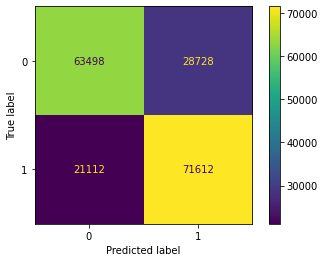

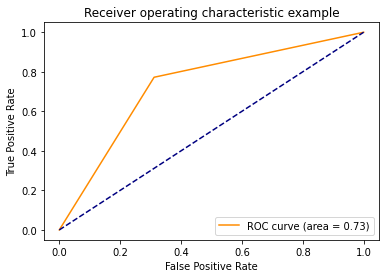

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log = GridSearchCV(LogisticRegression(), param_grid = {'C': [0.01, 1, 10 ]})
log.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, log)

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     92226
           1       0.70      0.77      0.73     92724

    accuracy                           0.72    184950
   macro avg       0.72      0.72      0.72    184950
weighted avg       0.72      0.72      0.72    184950



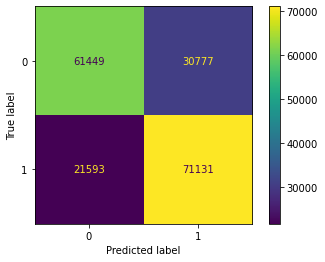

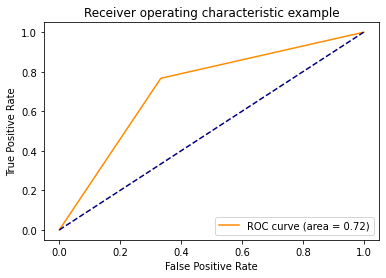

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GridSearchCV(GaussianNB(), param_grid = {'var_smoothing': [0.01, 1, 10 ]})
gnb.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, gnb)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     92226
           1       0.76      0.86      0.81     92724

    accuracy                           0.79    184950
   macro avg       0.80      0.79      0.79    184950
weighted avg       0.80      0.79      0.79    184950



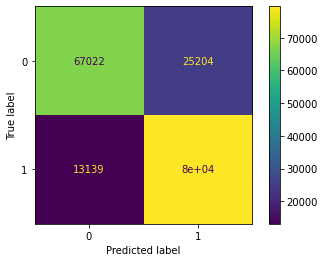

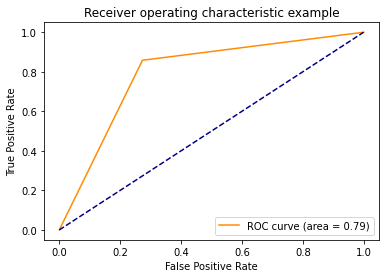

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = GridSearchCV(DecisionTreeClassifier(), param_grid = {'max_depth': [x for x in range(5, 100, 5)]})
dtc.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, dtc)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     92226
           1       0.76      0.86      0.81     92724

    accuracy                           0.79    184950
   macro avg       0.80      0.79      0.79    184950
weighted avg       0.80      0.79      0.79    184950



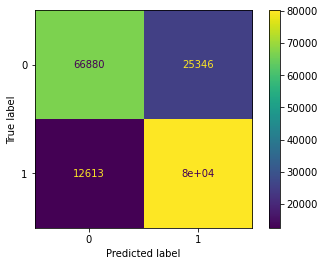

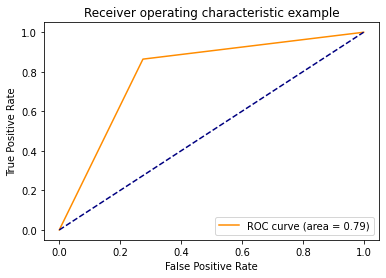

In [ ]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier

bag_dtmodel = GridSearchCV(BaggingClassifier(), param_grid = {'n_estimators': [100]})
bag_dtmodel.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, bag_dtmodel)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     92226
           1       0.74      0.79      0.77     92724

    accuracy                           0.76    184950
   macro avg       0.76      0.76      0.76    184950
weighted avg       0.76      0.76      0.76    184950



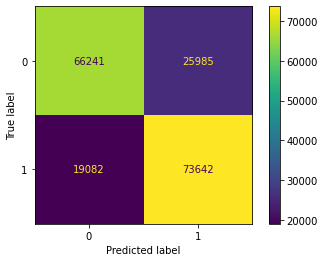

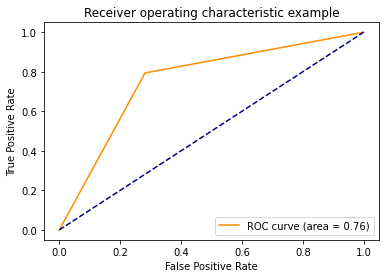

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_dtmodel = GridSearchCV(AdaBoostClassifier(), param_grid = {'n_estimators': [100]})
ada_dtmodel.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, ada_dtmodel)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     92226
           1       0.72      0.76      0.74     92724

    accuracy                           0.74    184950
   macro avg       0.74      0.74      0.74    184950
weighted avg       0.74      0.74      0.74    184950



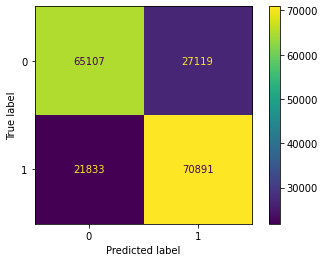

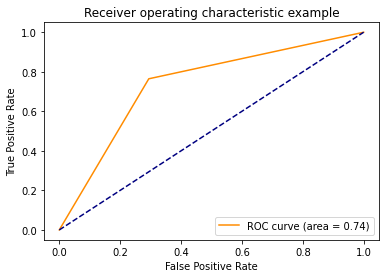

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, knn)

In [ ]:
#num_val_samples = Xtrain.shape[1]
#neural nets

import numpy as np

print(Xtrain.shape)
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0
print(Xtrain.shape)

(375503, 32)
(375503, 32)


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

model.fit(Xtrain, ytrain, batch_size = 100, epochs=10)

test_loss, test_acc = model.evaluate(Xtest, ytest, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
3756/3756 [==============================] - 15s 3ms/step - loss: 0.5428 - accuracy: 0.7233
Epoch 2/10
3756/3756 [==============================] - 11s 3ms/step - loss: 0.5350 - accuracy: 0.7290
Epoch 3/10
3756/3756 [==============================] - 11s 3ms/step - loss: 0.5333 - accuracy: 0.7306
Epoch 4/10
3756/3756 [==============================] - 12s 3ms/step - loss: 0.5321 - accuracy: 0.7313
Epoch 5/10
3756/3756 [==============================] - 12s 3ms/step - loss: 0.5310 - accuracy: 0.7326
Epoch 6/10
3756/3756 [==============================] - 12s 3ms/step - loss: 0.5298 - accuracy: 0.7344
Epoch 7/10
3756/3756 [==============================] - 11s 3ms/step - loss: 0.5285 - accuracy: 0.7351
Epoch 8/10
3756/3756 [==============================] - 11s 3ms/step - loss: 0.5273 - accuracy: 0.7356
Epoch 9/10
3756/3756 [==============================] - 12s 3ms/step - loss: 0.5265 - accuracy: 0.7363
Epoch 10/10
3756/3756 [==============================] - 12s 3ms/step - l

In [ ]:
p_pred = model.predict(Xtest)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

5780/5780 [==============================] - 8s 1ms/step
[0.57 0.67 0.32 ... 0.24 0.76 0.82]
[1 1 0 ... 0 1 1]


              precision    recall  f1-score   support

           0       0.79      0.64      0.71     92226
           1       0.70      0.83      0.76     92724

    accuracy                           0.74    184950
   macro avg       0.75      0.74      0.74    184950
weighted avg       0.75      0.74      0.74    184950



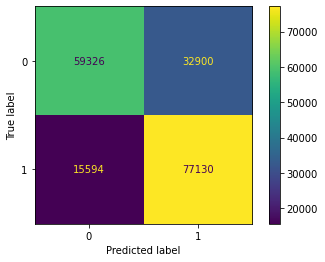

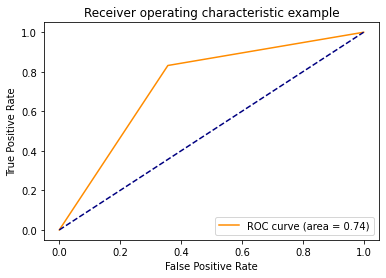

In [ ]:
evaluation(Xtest, ytest, y_pred)